In [1]:
import yt
import os
import re
import pysimulationio
from pysimulationio import SimulationIO as SIO
from pysimulationio import RegionCalculus as RC
from pysimulationio import H5
import numpy as np
%matplotlib inline

/home/jmiller/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import yt.frontends
print "simulationio valid: ",'simulationio' in dir(yt.frontends)
yt.__file__

simulationio valid:  True


'/home/jmiller/programming/yt-simulationio/yt/__init__.pyc'

## Data Inspection

In [3]:
ghosts = True

#base_dir='/home/jmiller/programming/SimulationIO-yt-tests'
#source_dir=base_dir+'/'+'cactus'
source_dir = '/home/jmiller/programming/yt-data'
if ghosts:
    fname='static-tov-cell-centred'#fname='iof5-static-tov-cell-centred'
else:
    fname='iof5-static-tov-no-ghosts'

fname += '.s5'
fpath=source_dir+'/'+fname

iteration = 0
timelevel = 0

config_template=re.compile('(iteration.)(0*)({}-timelevel.)(0*)({}\Z)'.format(iteration,timelevel))
config_template.search('iteration.00-timelevel.00').group(0)
configurationname='iteration.0000000000-timelevel.0'
print fpath
print configurationname

/home/jmiller/programming/yt-data/static-tov-cell-centred.s5
iteration.0000000000-timelevel.0


In [4]:
project = pysimulationio.readProject(fpath)[0]
print project
manifold = project.manifolds.values()[0]

configuration = project.configurations[configurationname]
manifold = project.manifolds.values()[0]
dimensionality = manifold.dimension
coordinate_system=configuration.coordinatesystems.values()[0].lock()
mds = []
for d in manifold.discretizations.itervalues():
    if d.configuration.name == configurationname and len(d.parent_discretizations) == 0:
        mds.append(d)
base_discretization = mds[0]
subdiscretizations = []
d = base_discretization
discretizations = [d]
while True:
    sds = d.child_discretizations.values()
    if not sds:
        break
    assert len(sds) == 1
    sd = sds[0].lock()
    subdiscretizations.append(sd)
    d = sd.child_discretization
    discretizations.append(d)
print subdiscretizations
print len(subdiscretizations)
num_levels = len(discretizations)
disc = discretizations[1]
blocks = sorted(disc.discretizationblocks.iteritems())
myblock = blocks[0][-1]
region = myblock.region
active = myblock.active
num_grids=5
block = [None for i in range(num_grids)]
region = [None for i in range(num_grids)]
active = [None for i in range(num_grids)]
for i in range(num_grids):
    block[i] = sorted(discretizations[i].discretizationblocks.iteritems())[0][-1]
    region[i] = block[i].region
    active[i] = block[i].active

<pysimulationio.SimulationIO.Project; proxy of <Swig Object of type 'std::shared_ptr< Project > *' at 0x7fe399a82420> >
[<pysimulationio.SimulationIO.SubDiscretization; proxy of <Swig Object of type 'std::shared_ptr< SubDiscretization > *' at 0x7fe39b37f210> >, <pysimulationio.SimulationIO.SubDiscretization; proxy of <Swig Object of type 'std::shared_ptr< SubDiscretization > *' at 0x7fe399a82030> >, <pysimulationio.SimulationIO.SubDiscretization; proxy of <Swig Object of type 'std::shared_ptr< SubDiscretization > *' at 0x7fe399a82360> >, <pysimulationio.SimulationIO.SubDiscretization; proxy of <Swig Object of type 'std::shared_ptr< SubDiscretization > *' at 0x7fe399a81f30> >]
4


In [5]:
for i in range(num_grids):
    print i,region[i]

0 ([0,0,0]:[36,36,36])
1 ([2,2,2]:[47,47,47])
2 ([7,7,7]:[52,52,52])
3 ([17,17,17]:[62,62,62])
4 ([37,37,37]:[82,82,82])


In [6]:
discretizations[1].child_discretizations.values()[0].lock().parent_discretization.name

'iteration.0000000000-timelevel.0-level.01'

In [7]:
for d in discretizations:
    print d.name

iteration.0000000000-timelevel.0-level.00
iteration.0000000000-timelevel.0-level.01
iteration.0000000000-timelevel.0-level.02
iteration.0000000000-timelevel.0-level.03
iteration.0000000000-timelevel.0-level.04


In [8]:
for d in subdiscretizations:
    print d.name

iteration.0000000000-timelevel.0-map.000-level.01
iteration.0000000000-timelevel.0-map.000-level.02
iteration.0000000000-timelevel.0-map.000-level.03
iteration.0000000000-timelevel.0-map.000-level.04


In [9]:
for key in project.parameters['iteration'].parametervalues.iterkeys():
    print key
for val in project.parameters['iteration'].parametervalues.itervalues():
    print val
print dir(project.parameters['iteration'].parametervalues.values()[0])
project.parameters['iteration'].parametervalues.values()[0]
project.parameters['iteration'].parametervalues.values()[0].configurations.keys()

iteration.0000000000
<pysimulationio.SimulationIO.ParameterValue; proxy of <Swig Object of type 'std::shared_ptr< ParameterValue > *' at 0x7fe399a81570> >
['__class__', '__del__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattr__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__swig_destroy__', '__swig_getmethods__', '__swig_setmethods__', '__weakref__', 'configurations', 'invariant', 'name', 'parameter', 'this']


['iteration.0000000000-timelevel.0']

In [10]:
for d in manifold.discretizations.itervalues():
    print d.name
    print d.parent_discretizations.keys()

iteration.0000000000-timelevel.0-level.00
[]
iteration.0000000000-timelevel.0-level.01
['iteration.0000000000-timelevel.0-map.000-level.01']
iteration.0000000000-timelevel.0-level.02
['iteration.0000000000-timelevel.0-map.000-level.02']
iteration.0000000000-timelevel.0-level.03
['iteration.0000000000-timelevel.0-map.000-level.03']
iteration.0000000000-timelevel.0-level.04
['iteration.0000000000-timelevel.0-map.000-level.04']


In [11]:
num_grids = 5
dimensionality = 3
gz = np.zeros((num_grids,2,dimensionality),
              dtype='int64')
for i in range(num_grids):
    gz[i,0,...] = np.array([3,3,3])
for i in range(1,num_grids):
    gz[i,1,...] = np.array([12,12,12])
gz[0,0,...] = np.array([3,3,3])

In [12]:
ds = yt.load(fpath,configuration=configurationname)
"""
             domain_left_edge=[-24,-24,-24],
             domain_dds=[8,8,8],
             configuration=configurationname,
             ghost_zones=gz)"""

yt : [INFO     ] 2016-12-06 15:28:19,855 SimulationIO: Configuration "iteration.0000000000-timelevel.0"
yt : [INFO     ] 2016-12-06 15:28:19,862 SimulationIO: Discretization "iteration.0000000000-timelevel.0-level.00"
yt : [INFO     ] 2016-12-06 15:28:19,869 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.01"
yt : [INFO     ] 2016-12-06 15:28:19,879 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.02"
yt : [INFO     ] 2016-12-06 15:28:19,882 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.03"
yt : [INFO     ] 2016-12-06 15:28:19,885 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.04"
yt : [INFO     ] 2016-12-06 15:28:19,889 SimulationIO: CoordinateSystem "GRID-iteration.0000000000-timelevel.0"
yt : [INFO     ] 2016-12-06 15:28:19,892 SimulationIO: Field "GRID-iteration.0000000000-timelevel.0-x"
yt : [INFO     ] 2016-12-06 15:28:19,895 SimulationIO: Field "GRID-

'\n             domain_left_edge=[-24,-24,-24],\n             domain_dds=[8,8,8],\n             configuration=configurationname,\n             ghost_zones=gz)'

In [13]:
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         27000	            30
  1	     1	         27000	            30
  2	     1	         27000	            30
  3	     1	         27000	            30
  4	     1	         27000	            30
----------------------------------------------
   	     5	        135000


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 2.393e-20 Mpc
	Width: 2.393e-14 pc
	Width: 4.935e-09 AU
	Width: 7.383e+04 cm


In [14]:
for grid in ds.index.grids:
    print grid.Parent,grid.Children

None [SimulationIOGrid_0001 ([30 30 30])]
SimulationIOGrid_0000 ([30 30 30]) [SimulationIOGrid_0002 ([30 30 30])]
SimulationIOGrid_0001 ([30 30 30]) [SimulationIOGrid_0003 ([30 30 30])]
SimulationIOGrid_0002 ([30 30 30]) [SimulationIOGrid_0004 ([30 30 30])]
SimulationIOGrid_0003 ([30 30 30]) []


In [15]:
for g in ds.index.grids:
    print g.LeftEdge,g.RightEdge

[ 0.  0.  0.] code_length [ 240.  240.  240.] code_length
[ 0.  0.  0.] code_length [ 120.  120.  120.] code_length
[ 0.  0.  0.] code_length [ 60.  60.  60.] code_length
[ 0.  0.  0.] code_length [ 30.  30.  30.] code_length
[ 0.  0.  0.] code_length [ 15.  15.  15.] code_length


In [16]:
ds.field_list

[('simulationio', 'ADMBASE::alp'),
 ('simulationio', 'ADMBASE::beta[0]'),
 ('simulationio', 'ADMBASE::beta[1]'),
 ('simulationio', 'ADMBASE::beta[2]'),
 ('simulationio', 'ADMBASE::g[00]'),
 ('simulationio', 'ADMBASE::g[01]'),
 ('simulationio', 'ADMBASE::g[02]'),
 ('simulationio', 'ADMBASE::g[11]'),
 ('simulationio', 'ADMBASE::g[12]'),
 ('simulationio', 'ADMBASE::g[22]'),
 ('simulationio', 'ADMBASE::k[00]'),
 ('simulationio', 'ADMBASE::k[01]'),
 ('simulationio', 'ADMBASE::k[02]'),
 ('simulationio', 'ADMBASE::k[11]'),
 ('simulationio', 'ADMBASE::k[12]'),
 ('simulationio', 'ADMBASE::k[22]'),
 ('simulationio', 'GRID::r'),
 ('simulationio', 'GRID::x'),
 ('simulationio', 'GRID::y'),
 ('simulationio', 'GRID::z'),
 ('simulationio', 'HYDROBASE::eps'),
 ('simulationio', 'HYDROBASE::press'),
 ('simulationio', 'HYDROBASE::rho'),
 ('simulationio', 'HYDROBASE::vel[0]'),
 ('simulationio', 'HYDROBASE::vel[1]'),
 ('simulationio', 'HYDROBASE::vel[2]'),
 ('simulationio', 'ML_ADMCONSTRAINTS::H'),
 ('simul

In [17]:
ds.derived_field_list

[('gas', 'H_nuclei_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'cylindrical_radial_velocity'),
 ('gas', 'cylindrical_radial_velocity_absolute'),
 ('gas', 'cylindrical_tangential_velocity'),
 ('gas', 'cylindrical_tangential_velocity_absolute'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'density_gradient_y'),
 ('gas', 'density_gradient_z'),
 ('gas', 'dx'),
 ('gas', 'dy'),
 ('gas', 'dynamical_time'),
 ('gas', 'dz'),
 ('gas', 'emission_measure'),
 ('gas

In [18]:
print ds.domain_width

[ 240.  240.  240.] code_length


In [19]:
for g in ds.index.grids:
    print g.Level,g.start_index,g.stop_index

0 [0 0 0] [30 30 30]
1 [0 0 0] [30 30 30]
2 [0 0 0] [30 30 30]
3 [0 0 0] [30 30 30]
4 [0 0 0] [30 30 30]


In [20]:
g1 = ds.index.grids[0]
g2 = ds.index.grids[-1]
g=g1

In [21]:
print g1.LeftEdge,g1.RightEdge
print g2.LeftEdge,g2.RightEdge
print g1['GRID::z'][0,0,0],g2['GRID::z'][0,0,0]
print g1['GRID::x'][0,0,0],g2['GRID::x'][0,0,0]
print g1['GRID::y'][0,0,0],g2['GRID::y'][0,0,0]
print g1['HYDROBASE::rho'][-1,-1,-1],g2['HYDROBASE::rho'][-1,-1,-1],g2['HYDROBASE::rho'][0,0,0]

[ 0.  0.  0.] code_length [ 240.  240.  240.] code_length
[ 0.  0.  0.] code_length [ 15.  15.  15.] code_length


yt : [INFO     ] 2016-12-06 15:28:22,221 Reading 27000 cells for fields ['GRID::z']


4.0 code_length

yt : [INFO     ] 2016-12-06 15:28:22,268 Reading 27000 cells for fields ['GRID::z']


 0.25 code_length


yt : [INFO     ] 2016-12-06 15:28:22,318 Reading 27000 cells for fields ['GRID::x']


4.0 code_length

yt : [INFO     ] 2016-12-06 15:28:22,349 Reading 27000 cells for fields ['GRID::x']


 0.25 code_length


yt : [INFO     ] 2016-12-06 15:28:22,404 Reading 27000 cells for fields ['GRID::y']


4.0 code_length

yt : [INFO     ] 2016-12-06 15:28:22,417 Reading 27000 cells for fields ['GRID::y']


 0.25 code_length


yt : [INFO     ] 2016-12-06 15:28:22,451 Reading 27000 cells for fields ['HYDROBASE::rho']


1e-10 m_geom/l_geom**3

yt : [INFO     ] 2016-12-06 15:28:22,471 Reading 27000 cells for fields ['HYDROBASE::rho']


 1e-10 m_geom/l_geom**3 0.0012703464742 m_geom/l_geom**3


In [22]:
print "level\tgrid\t\t\t\t   child\t\t\t\tparent"
print "---------------------------------------------------------------------------------------------------------"
for g in ds.index.grids:
    print g.Level,"\t",g,g.Children,g.Parent

level	grid				   child				parent
---------------------------------------------------------------------------------------------------------
0 	SimulationIOGrid_0000 ([30 30 30]) [SimulationIOGrid_0001 ([30 30 30])] None
1 	SimulationIOGrid_0001 ([30 30 30]) [SimulationIOGrid_0002 ([30 30 30])] SimulationIOGrid_0000 ([30 30 30])
2 	SimulationIOGrid_0002 ([30 30 30]) [SimulationIOGrid_0003 ([30 30 30])] SimulationIOGrid_0001 ([30 30 30])
3 	SimulationIOGrid_0003 ([30 30 30]) [SimulationIOGrid_0004 ([30 30 30])] SimulationIOGrid_0002 ([30 30 30])
4 	SimulationIOGrid_0004 ([30 30 30]) [] SimulationIOGrid_0003 ([30 30 30])


In [23]:
for g in ds.index.grids:
    print g.Level,g.LeftEdge,g.RightEdge,g.dds

0 [ 0.  0.  0.] code_length [ 240.  240.  240.] code_length [ 8.  8.  8.] code_length
1 [ 0.  0.  0.] code_length [ 120.  120.  120.] code_length [ 4.  4.  4.] code_length
2 [ 0.  0.  0.] code_length [ 60.  60.  60.] code_length [ 2.  2.  2.] code_length
3 [ 0.  0.  0.] code_length [ 30.  30.  30.] code_length [ 1.  1.  1.] code_length
4 [ 0.  0.  0.] code_length [ 15.  15.  15.] code_length [ 0.5  0.5  0.5] code_length


In [24]:
print ds.domain_left_edge
print ds.domain_right_edge

[ 0.  0.  0.] code_length
[ 240.  240.  240.] code_length


In [26]:
for f in ds.field_list:
    fv = g[f]
    if fv.size == 0: continue
    print f, fv.min(), fv.max()

yt : [INFO     ] 2016-12-06 15:28:57,708 Reading 27000 cells for fields ['ADMBASE::alp']


('simulationio', 'ADMBASE::alp') 0.670892509938 dimensionless 0.946656170584 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,001 Reading 27000 cells for fields ['ADMBASE::beta[0]']


('simulationio', 'ADMBASE::beta[0]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,066 Reading 27000 cells for fields ['ADMBASE::beta[1]']


('simulationio', 'ADMBASE::beta[1]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,114 Reading 27000 cells for fields ['ADMBASE::beta[2]']


('simulationio', 'ADMBASE::beta[2]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,151 Reading 27000 cells for fields ['ADMBASE::g[00]']


('simulationio', 'ADMBASE::g[00]') 1.11419955242 dimensionless 2.02718505953 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,182 Reading 27000 cells for fields ['ADMBASE::g[01]']


('simulationio', 'ADMBASE::g[01]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,249 Reading 27000 cells for fields ['ADMBASE::g[02]']


('simulationio', 'ADMBASE::g[02]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,298 Reading 27000 cells for fields ['ADMBASE::g[11]']


('simulationio', 'ADMBASE::g[11]') 1.11419955242 dimensionless 2.02718505953 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,361 Reading 27000 cells for fields ['ADMBASE::g[12]']


('simulationio', 'ADMBASE::g[12]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,395 Reading 27000 cells for fields ['ADMBASE::g[22]']


('simulationio', 'ADMBASE::g[22]') 1.11419955242 dimensionless 2.02718505953 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,468 Reading 27000 cells for fields ['ADMBASE::k[00]']


('simulationio', 'ADMBASE::k[00]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,515 Reading 27000 cells for fields ['ADMBASE::k[01]']


('simulationio', 'ADMBASE::k[01]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,576 Reading 27000 cells for fields ['ADMBASE::k[02]']


('simulationio', 'ADMBASE::k[02]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,622 Reading 27000 cells for fields ['ADMBASE::k[11]']


('simulationio', 'ADMBASE::k[11]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,655 Reading 27000 cells for fields ['ADMBASE::k[12]']


('simulationio', 'ADMBASE::k[12]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,705 Reading 27000 cells for fields ['ADMBASE::k[22]']


('simulationio', 'ADMBASE::k[22]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:28:58,751 Reading 27000 cells for fields ['GRID::r']


('simulationio', 'GRID::r') 0.433012701892 code_length 25.5477494116 code_length
('simulationio', 'GRID::x') 0.25 code_length 14.75 code_length
('simulationio', 'GRID::y') 0.25 code_length 14.75 code_length
('simulationio', 'GRID::z') 0.25 code_length 14.75 code_length


yt : [INFO     ] 2016-12-06 15:28:58,807 Reading 27000 cells for fields ['HYDROBASE::eps']


('simulationio', 'HYDROBASE::eps') 1e-08 c**2 0.12703464742 c**2


yt : [INFO     ] 2016-12-06 15:28:58,862 Reading 27000 cells for fields ['HYDROBASE::press']


('simulationio', 'HYDROBASE::press') 1e-18 m_geom/(l_geom*t_geom**2) 0.00016137801645 m_geom/(l_geom*t_geom**2)
('simulationio', 'HYDROBASE::rho') 1e-10 m_geom/l_geom**3 0.0012703464742 m_geom/l_geom**3


yt : [INFO     ] 2016-12-06 15:28:58,916 Reading 27000 cells for fields ['HYDROBASE::vel[0]']


('simulationio', 'HYDROBASE::vel[0]') 0.0 c 0.0 c


yt : [INFO     ] 2016-12-06 15:28:58,969 Reading 27000 cells for fields ['HYDROBASE::vel[1]']


('simulationio', 'HYDROBASE::vel[1]') 0.0 c 0.0 c


yt : [INFO     ] 2016-12-06 15:28:59,010 Reading 27000 cells for fields ['HYDROBASE::vel[2]']


('simulationio', 'HYDROBASE::vel[2]') 0.0 c 0.0 c


yt : [INFO     ] 2016-12-06 15:28:59,031 Reading 27000 cells for fields ['ML_ADMCONSTRAINTS::H']


('simulationio', 'ML_ADMCONSTRAINTS::H') -7.09897784218e-05 m_geom/l_geom**3 0.000233482136542 m_geom/l_geom**3


yt : [INFO     ] 2016-12-06 15:28:59,087 Reading 27000 cells for fields ['ML_ADMCONSTRAINTS::M[0]']


('simulationio', 'ML_ADMCONSTRAINTS::M[0]') 0.0 c*m_geom 0.0 c*m_geom


yt : [INFO     ] 2016-12-06 15:28:59,143 Reading 27000 cells for fields ['ML_ADMCONSTRAINTS::M[1]']


('simulationio', 'ML_ADMCONSTRAINTS::M[1]') 0.0 c*m_geom 0.0 c*m_geom


yt : [INFO     ] 2016-12-06 15:28:59,192 Reading 27000 cells for fields ['ML_ADMCONSTRAINTS::M[2]']


('simulationio', 'ML_ADMCONSTRAINTS::M[2]') 0.0 c*m_geom 0.0 c*m_geom


In [27]:
for k in ds.index._fields.iterkeys():
    print k

ADMBASE::alp
ADMBASE::beta
ADMBASE::g
ADMBASE::k
GRID::r
GRID::x
GRID::y
GRID::z
HYDROBASE::eps
HYDROBASE::press
HYDROBASE::rho
HYDROBASE::vel
ML_ADMCONSTRAINTS::H
ML_ADMCONSTRAINTS::M


In [28]:
sp = ds.sphere([0.0, 0.0, 0.0], (5, 'l_geom'))

In [29]:
print sp

YTSphere (static-tov-cell-centred.s5): , center=[ 0.  0.  0.] l_geom, radius=5.0 l_geom


In [30]:
print sp.quantities.keys()

['SpinParameter', 'MinLocation', 'WeightedVariance', 'TotalMass', 'AngularMomentumVector', 'WeightedAverageQuantity', 'SampleAtMaxFieldValues', 'TotalQuantity', 'CenterOfMass', 'BulkVelocity', 'Extrema', 'MaxLocation', 'SampleAtMinFieldValues']


In [31]:
for g in ds.index.grids:
    print g.start_index

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]


In [32]:
print sp.quantities.total_quantity('ones')

528.0 dimensionless


In [33]:
print sp.quantities.extrema('GRID::r')

yt : [INFO     ] 2016-12-06 15:28:59,445 Reading 528 cells for fields ['GRID::r']


[ 0.4330127   4.96865173] code_length


In [34]:
print sp.quantities.total_quantity('GRID::x')

yt : [INFO     ] 2016-12-06 15:28:59,628 Reading 528 cells for fields ['GRID::x']


993.5 code_length


In [35]:
g = ds.index.grids[0]
mask = g['GRID::x'][g.child_mask]
print np.min(mask),np.max(mask)

4.0 code_length 236.0 code_length


## Simple Visualization

In [36]:
p = yt.SlicePlot(ds, "z",("gas","lapse"),center=[120,120,0],width=240)
p.set_cmap(field="all", cmap="jet")
p.set_log('lapse',False)
p.annotate_grids()
p.show()

yt : [INFO     ] 2016-12-06 15:28:59,780 Reading 3600 cells for fields ['ADMBASE::alp']
yt : [INFO     ] 2016-12-06 15:28:59,924 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:28:59,927 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:28:59,938 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:28:59,942 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:28:59,949 Making a fixed resolution buffer of (('gas', 'lapse')) 800 by 800


yt : [INFO     ] 2016-12-06 15:29:02,948 Reading 3600 cells for fields ['ADMBASE::g[11]', 'ADMBASE::g[22]', 'ADMBASE::g[01]', 'ADMBASE::g[12]', 'ADMBASE::g[02]', 'ADMBASE::g[00]']
yt : [INFO     ] 2016-12-06 15:29:03,787 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:29:03,791 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:29:03,797 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:29:03,799 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:29:03,804 Making a fixed resolution buffer of (('gas', 'metric_volume_form')) 800 by 800



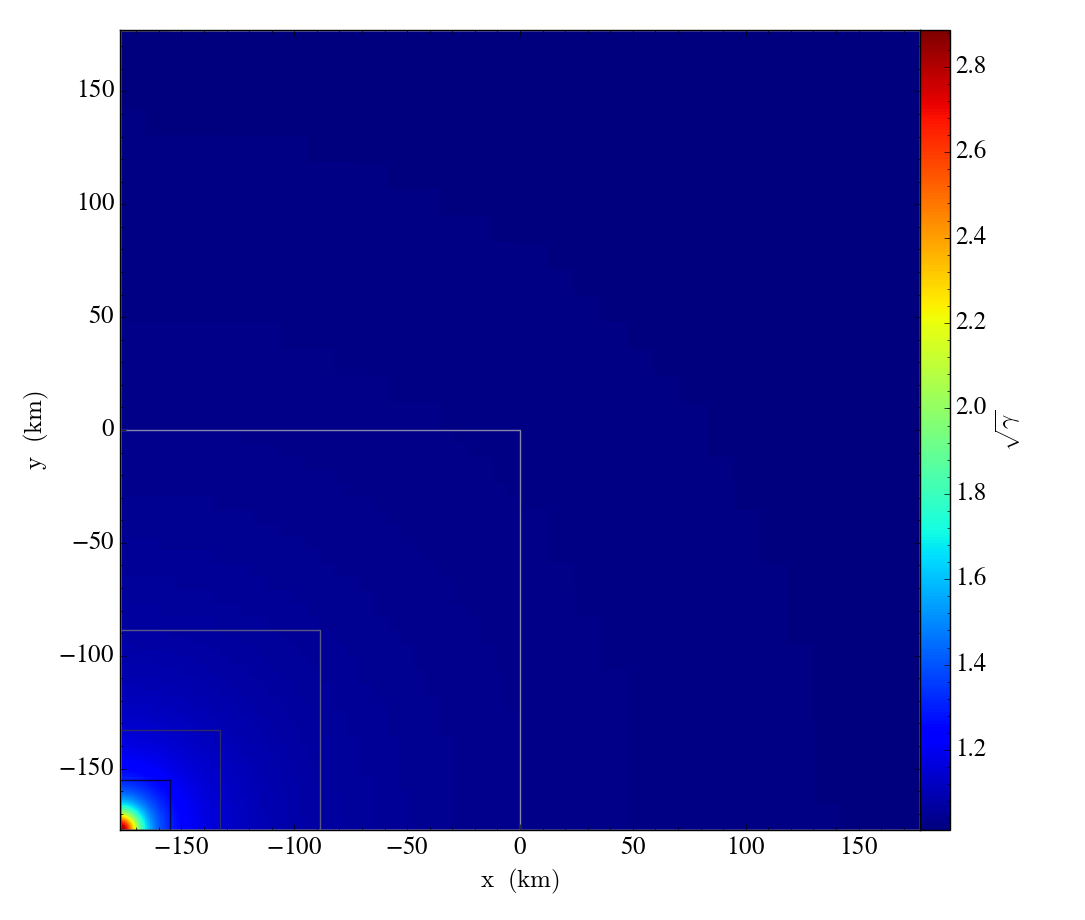

In [37]:
p = yt.SlicePlot(ds, "z",("gas","metric_volume_form"),center=[120,120,0],width=240)
p.set_cmap(field="all", cmap="jet")
p.set_log('metric_volume_form',False)
p.annotate_grids()
p.show()

In [ ]:
p = yt.SlicePlot(ds, "z", ("gas","density"),center=[120,120,0],width=240)
p.set_cmap(field="all", cmap="jet")
p.set_log('density',False)
p.annotate_grids()
p.show()

yt : [INFO     ] 2016-12-06 15:29:06,488 Reading 3600 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-12-06 15:29:06,622 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:29:06,626 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:29:06,632 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:29:06,637 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:29:06,643 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


In [ ]:
p = yt.SlicePlot(ds, "z", "trace_extrinsic_curvature",center=[120,120,0],width=240)
p.set_cmap(field="all", cmap="jet")
p.set_log('trace_extrinsic_curvature',False)
p.annotate_grids()
p.show()

yt : [INFO     ] 2016-12-06 15:29:10,042 Reading 3600 cells for fields ['ADMBASE::k[00]', 'ADMBASE::k[11]', 'ADMBASE::k[22]']
yt : [INFO     ] 2016-12-06 15:29:10,593 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:29:10,598 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:29:10,606 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:29:10,610 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-12-06 15:29:10,618 Making a fixed resolution buffer of (('gas', 'trace_extrinsic_curvature')) 800 by 800
yt : [WARNING  ] 2016-12-06 15:29:10,717 Plot image for field ('gas', 'trace_extrinsic_curvature') has zero dynamic range. Min = Max = 0.000000.
yt : [WARNING  ] 2016-12-06 15:29:10,720 Switching to linear colorbar scaling.


In [ ]:
print ds.index.grids[0]['extrinsic_curvature_xx'].shape
print ds.index.grids[0]['extrinsic_curvature_yy'].shape
print ds.index.grids[0]['extrinsic_curvature_zz'].shape

In [ ]:
p = yt.SlicePlot(ds, "z", "lapse",center=[120,120,0],width=240)
p.set_cmap(field="all", cmap="jet")
p.set_log('ADMBASE::alp',False)
p.annotate_grids()
p.show()
p.save('sliceplot.png')

In [ ]:
prj = yt.ProjectionPlot(ds, 'z','metric_volume_form',center=[120,120,0],width=240)
prj.set_cmap(field="all", cmap="jet")
prj.set_log('metric_volume_form',False)
prj.annotate_grids()
prj.show()
prj.save('projectionplot.png')

In [ ]:
prj = yt.ProjectionPlot(ds, 'z','ADMBASE::alp',center=[120,120,0],width=240)
prj.set_cmap(field="all", cmap="jet")
prj.set_log('ADMBASE::alp',False)
prj.annotate_grids()
prj.show()
prj.save('projectionplot.png')

In [ ]:
p = yt.SlicePlot(ds, "z", "HYDROBASE::rho",center=[5,5,0],width=10)
p.set_cmap(field="all", cmap="jet")
p.annotate_grids()
p.show()

In [ ]:
p = yt.SlicePlot(ds, 'z', "grid_level",center=[120,120,0],width=240)
#p.set_cmap(field="all", cmap="jet")
p.set_log("grid_level",False)
p.annotate_grids()
p.show()
p.save('grid_level_slice.png')

In [ ]:
p = yt.ProjectionPlot(ds, 'z', "grid_level",center=[120,120,0],width=240)
#p.set_cmap(field="all", cmap="jet")
p.set_log("grid_level",False)
p.annotate_grids()
p.show()
p.save('grid_level_projection.png')

In [ ]:
L = np.array([0,0,1])
c = np.array([120,120,0])
image = yt.OffAxisProjectionPlot(ds,L,'metric_determinant',c,width=240)
image.save('static-tov-off-axis-projection.png')
image.show()

In [ ]:
L = np.array([0,0,1])
c = np.array([120,120,0])
image = yt.OffAxisProjectionPlot(ds,L,'density',c,width=240)
image.save('static-tov-off-axis-projection.png')
image.show()

In [ ]:
L = np.array([0,0,1])
c = np.array([120,120,0])
image = yt.OffAxisProjectionPlot(ds,L,'lapse',c,width=240)
image.save('static-tov-off-axis-projection.png')
image.show()

In [ ]:
dd = ds.all_data()
for chunk in dd.chunks([], "all"): 
    print chunk.fcoords.min(axis=0)

In [ ]:
ds.index.grids[0].fcoords.min(axis=0)

In [ ]:
for g in ds.index.grids:
    print g.Level,g.Parent,g.Children

In [ ]:
from yt.utilities.lib.misc_utilities import get_box_grids_level

In [ ]:
mask = np.empty(len(ds.index.grids),dtype='int32')
get_box_grids_level(ds.index.grids[0].LeftEdge,
                   ds.index.grids[0].RightEdge,
                   1,
                   ds.index.grid_left_edge,
                   ds.index.grid_right_edge,
                   ds.index.grid_levels,
                   mask)

In [ ]:
np.where(mask.astype('bool'))[0]

In [ ]:
from yt.frontends.simulationio.misc import _map_name_to_yt_style

In [ ]:
_map_name_to_yt_style('metric[12]')

In [ ]:
project.name

In [ ]:
fpath